In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import math

In [192]:
df = pd.read_csv("../raw_data.csv")
# df = pd.read_csv("../final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Editora       3917 non-null   object 
 1   ISBN          3917 non-null   object 
 2   Ano           3917 non-null   float64
 3   Edição        3917 non-null   float64
 4   Origem        3917 non-null   object 
 5   Encadernação  3917 non-null   object 
 6   Idioma        3917 non-null   object 
 7   País          3917 non-null   object 
 8   Páginas       3917 non-null   float64
 9   preço         3917 non-null   float64
 10  nome          3917 non-null   object 
 11  categoria     3917 non-null   object 
 12  Autores       3916 non-null   object 
dtypes: float64(4), object(9)
memory usage: 397.9+ KB


In [193]:
k = int(1 + 3.3 * math.log10(df.shape[0]))
plt.rcParams["figure.figsize"] = (12, 7)

# Removendo campo não relevantes (identificadores)

In [194]:
df = df.drop(['ISBN'],axis=1)

# Analisando features numéricas

## Correlação entre features numéricas

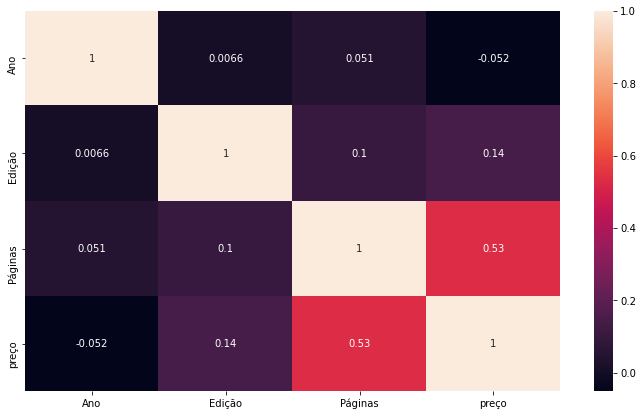

In [195]:
corr = df.corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

### Apenas o número de páginas parece ter uma correlçao positiva relevante

In [196]:
df.describe()

,Ano,Edição,Páginas,preço
count,3917.000000,3917.000000,3917.000000,3917.000000
mean,2014.596630,3.346183,287.652285,67.643572
std,6.634379,64.398312,256.673567,71.241467
min,1966.000000,1.000000,2.000000,1.710000
25%,2012.000000,1.000000,151.000000,39.500000
50%,2016.000000,1.000000,232.000000,49.900000
75%,2019.000000,1.000000,340.000000,73.790000
max,2021.000000,2016.000000,4032.000000,1551.000000


## Analisando a feature Ano

## Qual a distribuilção dos livros por ano?

In [197]:
cats = ['MEDICINA','INFORMÁTICA E TECNOLOGIA','CIÊNCIAS EXATAS','VIDEOGAMES','HQS','ECONOMIA','CIÊNCIAS BIOLÓGICAS']

In [198]:
fig = px.histogram(df, x="Ano",nbins=k)
fig.show()

In [199]:
ano_dist = df['Ano'].value_counts().reset_index(name='quantidade').sort_values(by='index').rename(columns={'index':'Ano'})
fig = px.line(ano_dist, x="Ano", y="quantidade", title='Livros publicados por ano')
fig.show()

### 2014 teve um boom na publicação de livros, mas no geral, a quantidade de livros publicados parece vir aumentando

In [200]:
ano_cat_dist = df[df['categoria'].isin(cats)].groupby(by=['Ano','categoria']).size().reset_index(name='counts')
fig = px.line(ano_cat_dist, x="Ano", y="counts", color='categoria',title='Quantidade de livros publicados por ano e categoria')
fig.show()

In [201]:
top_5_editoras = list(df['Editora'].value_counts()[1:6].reset_index(name='quatide')['index'])

In [202]:
ano_cat_dist = df[df['Editora'].isin(top_5_editoras)].groupby(by=['Ano','Editora']).size().reset_index(name='counts')
fig = px.line(ano_cat_dist, x="Ano", y="counts", color='Editora',title='Quantidade de livros publicados por ano para as 5 principais editoras')
fig.show()

## Qual o preço médio dos livros pelo anos?

In [203]:
preco_medio_ano = df.groupby(by='Ano')['preço'].mean().reset_index(name='preço médio').rename(columns={'index':'Ano'})
fig = px.line(preco_medio_ano, x="Ano", y="preço médio", title='Preço médio por ano')
fig.show()

### Não parece haver uma tendência

In [204]:
preco_medio_ano = df[df['categoria'].isin(cats)].groupby(by=['Ano','categoria'])['preço'].mean().reset_index(name='preço médio').rename(columns={'index':'Ano'})
fig = px.line(preco_medio_ano, x="Ano", y="preço médio", color='categoria', title='Preço médio por ano e categoria')
fig.show()

# Existe correlação entre os campos categóricos?

In [205]:
df['Editora'].value_counts()

COMPANHIA DAS LETRAS    157
MADRAS                  128
SEXTANTE                111
CONTEXTO                 98
VOZES                    96
                       ... 
EDIÇOES LIVRE             1
CHRONICLE BOOKS           1
POSITIVO - LIVROS         1
EDITORA ALLER 106         1
GEN                       1
Name: Editora, Length: 502, dtype: int64